# EDA: S&P 500 Company Stocks in Consumer Staples, Energy & Financial Sectors


---

Raw data download and description: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

Intro: In the world of investing, selecting the right stocks is like assembling a winning team. Our goal is to create a smart and reliable portfolio by carefully picking 30 stocks from the S&P 500 companies. We're focusing on companies showing positive trends and less volatility, aiming for a stable and promising investment journey. This strategic approach ensures that our portfolio is well-positioned for success, offering growth potential while minimizing risks. Let's dive into the world of these carefully chosen stocks, shaping a portfolio that aligns with our vision for financial success.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Modules

In [ ]:
# some useful modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

In [ ]:
%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not shutil.which("ipopt"):
    # here is the IPOPT zip file
    !gdown 10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
    !unzip -o -q ipopt-linux64_dw
    assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *

SOLVER = 'ipopt'
EXECUTABLE = '/content/ipopt'
ipopt_executable = '/content/ipopt'

Downloading...
From: https://drive.google.com/uc?id=10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
To: /content/ipopt-linux64_dw.zip
100% 1.82M/1.82M [00:00<00:00, 191MB/s]


In [ ]:
# Assign the ticker list that we want to scrap
con_tickers = ['COST','DLTR','PEP','PG','WMT','EL','CL','MO','CLX','SYY']
energy_tickers = ['HES','PSX','DVN','CTRA','WMB','FANG','APA','XOM','OKE','VLO']
fin_tickers = ['JPM','IVZ','GS','DFS','KEY','MA','PRU','SPGI','WFC','V']
# pull historical price data for each stocks to match with our news score later
con_dod_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2021',interval='1d') for ticker in con_tickers}
energy_dod_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2021',interval='1d') for ticker in energy_tickers}
fin_dod_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2021',interval='1d') for ticker in fin_tickers}

In [ ]:
# Printing Consumer Staples Sector prices
con_dod_prices

{'COST':                   open        high         low       close    adjclose  \
 2017-01-03  160.649994  160.990005  158.509995  159.729996  140.580536   
 2017-01-04  159.800003  160.490005  158.940002  159.759995  140.606934   
 2017-01-05  160.949997  163.350006  160.630005  162.910004  143.379303   
 2017-01-06  162.669998  162.949997  161.130005  162.830002  143.308899   
 2017-01-09  162.330002  162.479996  160.720001  160.970001  141.671921   
 ...                ...         ...         ...         ...         ...   
 2021-12-23  551.739990  552.609985  547.489990  550.369995  542.603149   
 2021-12-27  551.539978  565.739990  551.440002  563.469971  555.518311   
 2021-12-28  563.429993  566.640015  560.700012  564.640015  556.671936   
 2021-12-29  566.400024  571.489990  563.500000  567.770020  559.757751   
 2021-12-30  569.530029  569.880005  562.369995  563.909973  555.952271   
 
              volume ticker  
 2017-01-03  2099000   COST  
 2017-01-04  2163600   COST  


In [ ]:
# Printing Energy Sector prices
energy_dod_prices

{'HES':                  open       high        low      close   adjclose   volume  \
 2017-01-03  63.380001  64.400002  62.150002  62.820000  56.006020  4531800   
 2017-01-04  62.840000  63.049999  60.880001  61.930000  55.212540  5007100   
 2017-01-05  62.110001  62.470001  60.939999  62.099998  55.364109  3797000   
 2017-01-06  62.209999  62.400002  61.700001  61.900002  55.185814  1978900   
 2017-01-09  61.330002  61.580002  60.570000  60.610001  54.035725  2492400   
 ...               ...        ...        ...        ...        ...      ...   
 2021-12-23  74.489998  75.220001  73.470001  73.489998  71.900711  1216500   
 2021-12-27  73.290001  75.660004  72.379997  75.610001  73.974876  1394900   
 2021-12-28  75.980003  76.529999  74.900002  75.279999  73.652008   827000   
 2021-12-29  74.949997  75.919998  74.339996  74.669998  73.055206   784200   
 2021-12-30  74.949997  75.790001  73.709999  73.959999  72.360565  1018100   
 
            ticker  
 2017-01-03    HES  
 

In [ ]:
# Printing Financials Sector prices
fin_dod_prices

{'JPM':                   open        high         low       close    adjclose  \
 2017-01-03   87.339996   87.760002   85.980003   87.230003   71.641159   
 2017-01-04   86.959999   87.180000   86.400002   86.910004   71.773285   
 2017-01-05   86.809998   87.110001   85.260002   86.110001   71.112625   
 2017-01-06   86.389999   86.620003   85.940002   86.120003   71.120857   
 2017-01-09   85.730003   86.769997   85.519997   86.180000   71.170425   
 ...                ...         ...         ...         ...         ...   
 2021-12-23  157.610001  159.119995  157.210007  157.259995  148.035553   
 2021-12-27  157.600006  158.199997  156.339996  158.160004  148.882767   
 2021-12-28  158.199997  160.149994  158.080002  158.639999  149.334625   
 2021-12-29  158.850006  159.630005  158.149994  158.559998  149.259293   
 2021-12-30  159.110001  160.240005  158.369995  158.479996  149.184006   
 
               volume ticker  
 2017-01-03  20550700    JPM  
 2017-01-04  15266600    JPM 

In [ ]:
# Initializing prepdata with a sample stock otherwise we will get an error

con_data = pd.DataFrame(con_dod_prices['COST']['adjclose']).rename(columns = {"adjclose":"COST"})
energy_data = pd.DataFrame(energy_dod_prices['HES']['adjclose']).rename(columns = {"adjclose":"HES"})
fin_data = pd.DataFrame(fin_dod_prices['JPM']['adjclose']).rename(columns = {"adjclose":"JPM"})

# let's extract just the data we need for all the tickers (adjclose)
for i in con_tickers[1:]:
  con_data[i] = pd.DataFrame(con_dod_prices[i]['adjclose'])


for i in energy_tickers[1:]:
  energy_data[i] = pd.DataFrame(energy_dod_prices[i]['adjclose'])


for i in fin_tickers[1:]:
  fin_data[i] = pd.DataFrame(fin_dod_prices[i]['adjclose'])


In [ ]:
con_data

,COST,DLTR,PEP,PG,WMT,EL,CL,MO,CLX,SYY
2017-01-03,140.580536,77.449997,85.533829,69.490379,60.387138,71.806633,55.467194,42.840878,100.120758,46.127014
2017-01-04,140.606934,79.449997,85.697289,69.737961,60.738907,73.078766,56.076530,42.980247,100.873619,46.548882
2017-01-05,143.379303,78.059998,85.582870,70.200142,60.870853,72.985901,56.575863,43.030922,101.510643,46.397011
2017-01-06,143.308899,77.089996,85.460274,70.175377,60.035316,73.505928,57.007492,43.220963,101.361740,46.726063
2017-01-09,141.671921,77.139999,84.561226,69.655418,60.431087,72.651634,56.211952,43.043591,100.352402,46.979187
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,542.603149,137.000000,160.741486,152.354019,135.770416,356.801025,78.796524,40.484325,159.381531,72.836006
2021-12-27,555.518311,138.470001,162.341507,154.133545,137.006577,359.998688,79.862503,40.562351,160.376343,73.653229
2021-12-28,556.671936,139.289993,163.184113,154.961456,138.972687,358.565582,80.385963,41.073822,161.352356,74.422920
2021-12-29,559.757751,140.300003,163.761673,156.246155,138.904572,360.788330,80.814262,41.091164,160.836182,74.061836


In [ ]:
energy_data

,HES,PSX,DVN,CTRA,WMB,FANG,APA,XOM,OKE,VLO
2017-01-03,56.006020,65.852829,35.980827,17.429716,21.291399,85.765106,55.337528,65.099457,37.309414,52.196781
2017-01-04,55.212540,66.209465,36.301800,17.453117,21.223721,86.030899,55.172680,64.383209,37.214157,50.321484
2017-01-05,55.364109,65.814903,37.455803,17.663774,21.480888,86.113960,54.877686,63.423458,37.360222,50.165829
2017-01-06,55.185814,64.798149,37.195972,17.858829,21.941103,86.105675,54.764893,63.387638,36.769623,49.409782
2017-01-09,54.035725,63.751076,35.598694,17.234665,21.609486,84.253296,54.105492,62.341919,36.502907,49.194828
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,71.900711,66.371666,37.316822,16.937193,23.563885,94.064667,25.031370,56.753998,51.528442,67.031860
2021-12-27,73.974876,67.193230,39.588661,17.391415,23.937626,98.681778,26.855675,57.563168,52.762928,68.340157
2021-12-28,73.652008,68.245567,39.491051,17.435087,23.846468,97.811630,26.817266,57.377151,52.754051,69.620430
2021-12-29,73.055206,67.248611,39.224812,17.478764,23.737080,96.524162,26.798061,56.874908,52.194534,69.760605


In [ ]:
fin_data

,JPM,IVZ,GS,DFS,KEY,MA,PRU,SPGI,WFC,V
2017-01-03,71.641159,22.374516,208.953094,62.033100,13.725602,101.200600,76.401192,101.427185,45.706970,75.789536
2017-01-04,71.773285,22.982164,210.302414,63.065147,13.913527,102.160858,77.333794,104.561981,45.747791,76.409180
2017-01-05,71.112625,22.801317,208.736816,62.178108,13.740641,102.949890,76.175339,105.357384,45.037689,77.305298
2017-01-06,71.120857,22.808550,211.833435,61.461651,13.770704,103.690811,76.612480,107.238281,44.923424,78.373024
2017-01-09,71.170425,22.316645,210.094818,61.086380,13.725602,103.488754,76.313751,106.003075,44.270466,77.934494
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,148.035553,21.357817,363.618164,109.781784,20.432964,356.305664,98.001129,464.987701,45.816551,213.299850
2021-12-27,148.882767,21.549980,366.451263,110.524200,20.747456,356.038849,98.526215,469.267181,46.204990,214.294388
2021-12-28,149.334625,21.531681,366.045227,110.476601,20.837309,356.503265,98.734436,466.322601,45.873394,214.707947
2021-12-29,149.259293,21.376120,364.713684,110.191063,20.936153,357.007294,98.752548,465.782745,45.901821,214.826111


In [ ]:
con_data.isnull().sum()

COST    0
DLTR    0
PEP     0
PG      0
WMT     0
EL      0
CL      0
MO      0
CLX     0
SYY     0
dtype: int64

In [ ]:
energy_data.isnull().sum()

HES     0
PSX     0
DVN     0
CTRA    0
WMB     0
FANG    0
APA     0
XOM     0
OKE     0
VLO     0
dtype: int64

In [ ]:
fin_data.isnull().sum()

JPM     0
IVZ     0
GS      0
DFS     0
KEY     0
MA      0
PRU     0
SPGI    0
WFC     0
V       0
dtype: int64

In [ ]:
# Drop any missing data
con_data.dropna(inplace=True)
con_data

,COST,DLTR,PEP,PG,WMT,EL,CL,MO,CLX,SYY
2017-01-03,140.580536,77.449997,85.533829,69.490379,60.387138,71.806633,55.467194,42.840878,100.120758,46.127014
2017-01-04,140.606934,79.449997,85.697289,69.737961,60.738907,73.078766,56.076530,42.980247,100.873619,46.548882
2017-01-05,143.379303,78.059998,85.582870,70.200142,60.870853,72.985901,56.575863,43.030922,101.510643,46.397011
2017-01-06,143.308899,77.089996,85.460274,70.175377,60.035316,73.505928,57.007492,43.220963,101.361740,46.726063
2017-01-09,141.671921,77.139999,84.561226,69.655418,60.431087,72.651634,56.211952,43.043591,100.352402,46.979187
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,542.603149,137.000000,160.741486,152.354019,135.770416,356.801025,78.796524,40.484325,159.381531,72.836006
2021-12-27,555.518311,138.470001,162.341507,154.133545,137.006577,359.998688,79.862503,40.562351,160.376343,73.653229
2021-12-28,556.671936,139.289993,163.184113,154.961456,138.972687,358.565582,80.385963,41.073822,161.352356,74.422920
2021-12-29,559.757751,140.300003,163.761673,156.246155,138.904572,360.788330,80.814262,41.091164,160.836182,74.061836


In [ ]:
# Drop any missing data
energy_data.dropna(inplace=True)
energy_data

,HES,PSX,DVN,CTRA,WMB,FANG,APA,XOM,OKE,VLO
2017-01-03,56.006020,65.852829,35.980827,17.429716,21.291399,85.765106,55.337528,65.099457,37.309414,52.196781
2017-01-04,55.212540,66.209465,36.301800,17.453117,21.223721,86.030899,55.172680,64.383209,37.214157,50.321484
2017-01-05,55.364109,65.814903,37.455803,17.663774,21.480888,86.113960,54.877686,63.423458,37.360222,50.165829
2017-01-06,55.185814,64.798149,37.195972,17.858829,21.941103,86.105675,54.764893,63.387638,36.769623,49.409782
2017-01-09,54.035725,63.751076,35.598694,17.234665,21.609486,84.253296,54.105492,62.341919,36.502907,49.194828
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,71.900711,66.371666,37.316822,16.937193,23.563885,94.064667,25.031370,56.753998,51.528442,67.031860
2021-12-27,73.974876,67.193230,39.588661,17.391415,23.937626,98.681778,26.855675,57.563168,52.762928,68.340157
2021-12-28,73.652008,68.245567,39.491051,17.435087,23.846468,97.811630,26.817266,57.377151,52.754051,69.620430
2021-12-29,73.055206,67.248611,39.224812,17.478764,23.737080,96.524162,26.798061,56.874908,52.194534,69.760605


In [ ]:
# Drop any missing data
fin_data.dropna(inplace=True)
fin_data

,JPM,IVZ,GS,DFS,KEY,MA,PRU,SPGI,WFC,V
2017-01-03,71.641159,22.374516,208.953094,62.033100,13.725602,101.200600,76.401192,101.427185,45.706970,75.789536
2017-01-04,71.773285,22.982164,210.302414,63.065147,13.913527,102.160858,77.333794,104.561981,45.747791,76.409180
2017-01-05,71.112625,22.801317,208.736816,62.178108,13.740641,102.949890,76.175339,105.357384,45.037689,77.305298
2017-01-06,71.120857,22.808550,211.833435,61.461651,13.770704,103.690811,76.612480,107.238281,44.923424,78.373024
2017-01-09,71.170425,22.316645,210.094818,61.086380,13.725602,103.488754,76.313751,106.003075,44.270466,77.934494
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,148.035553,21.357817,363.618164,109.781784,20.432964,356.305664,98.001129,464.987701,45.816551,213.299850
2021-12-27,148.882767,21.549980,366.451263,110.524200,20.747456,356.038849,98.526215,469.267181,46.204990,214.294388
2021-12-28,149.334625,21.531681,366.045227,110.476601,20.837309,356.503265,98.734436,466.322601,45.873394,214.707947
2021-12-29,149.259293,21.376120,364.713684,110.191063,20.936153,357.007294,98.752548,465.782745,45.901821,214.826111


In [ ]:
# data shape
print(con_data.shape, energy_data.shape, fin_data.shape)

(1258, 10) (1258, 10) (1258, 10)


In [ ]:
# creating return features for each ticker in Consumer Staples Sector
# we will use a pct_change - shows the fractional change in values over a series of time. Unline the name for % change we have to multiply by 100
return_con_data = pd.DataFrame()
for i in con_tickers:
  return_con_data[i] = con_data[i].pct_change()
# drop the na records
return_con_data.dropna(inplace=True)
return_con_data

,COST,DLTR,PEP,PG,WMT,EL,CL,MO,CLX,SYY
2017-01-04,0.000188,0.025823,0.001911,0.003563,0.005825,0.017716,0.010986,0.003253,0.007520,0.009146
2017-01-05,0.019717,-0.017495,-0.001335,0.006627,0.002172,-0.001271,0.008904,0.001179,0.006315,-0.003263
2017-01-06,-0.000491,-0.012426,-0.001432,-0.000353,-0.013726,0.007125,0.007629,0.004416,-0.001467,0.007092
2017-01-09,-0.011423,0.000649,-0.010520,-0.007409,0.006592,-0.011622,-0.013955,-0.004104,-0.009958,0.005417
2017-01-10,0.004287,0.010630,-0.014402,-0.010782,-0.006985,-0.011375,-0.015507,-0.003385,-0.015829,-0.006286
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.001273,0.003516,-0.001118,0.004896,-0.002218,0.011861,0.004002,-0.003840,-0.005505,0.018334
2021-12-27,0.023802,0.010730,0.009954,0.011680,0.009105,0.008962,0.013528,0.001927,0.006242,0.011220
2021-12-28,0.002077,0.005922,0.005190,0.005371,0.014350,-0.003981,0.006555,0.012609,0.006086,0.010450
2021-12-29,0.005543,0.007251,0.003539,0.008290,-0.000490,0.006199,0.005328,0.000422,-0.003199,-0.004852


In [ ]:
# creating return features for each ticker in Energy Sector
return_energy_data = pd.DataFrame()
for i in energy_tickers:
  return_energy_data[i] = energy_data[i].pct_change()
# drop the na records
return_energy_data.dropna(inplace=True)
return_energy_data

,HES,PSX,DVN,CTRA,WMB,FANG,APA,XOM,OKE,VLO
2017-01-04,-0.014168,0.005416,0.008921,0.001343,-0.003179,0.003099,-0.002979,-0.011002,-0.002553,-0.035927
2017-01-05,0.002745,-0.005959,0.031789,0.012070,0.012117,0.000965,-0.005347,-0.014907,0.003925,-0.003093
2017-01-06,-0.003220,-0.015449,-0.006937,0.011043,0.021424,-0.000096,-0.002055,-0.000565,-0.015808,-0.015071
2017-01-09,-0.020840,-0.016159,-0.042942,-0.034950,-0.015114,-0.021513,-0.012041,-0.016497,-0.007254,-0.004350
2017-01-10,0.013859,-0.003095,0.002576,0.003622,-0.107423,0.012620,0.008178,-0.012753,-0.024531,0.002411
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,-0.008366,0.003910,-0.005675,-0.018228,0.006620,0.002365,0.009292,0.000492,0.004154,0.006031
2021-12-27,0.028848,0.012378,0.060880,0.026818,0.015861,0.049084,0.072881,0.014257,0.023957,0.019518
2021-12-28,-0.004365,0.015661,-0.002466,0.002511,-0.003808,-0.008818,-0.001430,-0.003232,-0.000168,0.018734
2021-12-29,-0.008103,-0.014608,-0.006742,0.002505,-0.004587,-0.013163,-0.000716,-0.008753,-0.010606,0.002013


In [ ]:
# creating return features for each ticker in Financials Sector
return_fin_data = pd.DataFrame()
for i in fin_tickers:
  return_fin_data[i] = fin_data[i].pct_change()
# drop the na records
return_fin_data.dropna(inplace=True)
return_fin_data

,JPM,IVZ,GS,DFS,KEY,MA,PRU,SPGI,WFC,V
2017-01-04,0.001844,0.027158,0.006458,0.016637,0.013692,0.009489,0.012207,0.030907,0.000893,0.008176
2017-01-05,-0.009205,-0.007869,-0.007445,-0.014065,-0.012426,0.007723,-0.014980,0.007607,-0.015522,0.011728
2017-01-06,0.000116,0.000317,0.014835,-0.011523,0.002188,0.007197,0.005739,0.017853,-0.002537,0.013812
2017-01-09,0.000697,-0.021567,-0.008207,-0.006106,-0.003275,-0.001949,-0.003899,-0.011518,-0.014535,-0.005595
2017-01-10,0.002901,-0.005835,-0.001317,0.006842,0.012048,-0.002139,0.007925,-0.017038,0.007006,-0.005382
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.003574,0.023684,0.007088,0.004179,0.003530,0.008672,0.012534,0.001014,0.006871,-0.006148
2021-12-27,0.005723,0.008997,0.007791,0.006763,0.015391,-0.000749,0.005358,0.009203,0.008478,0.004663
2021-12-28,0.003035,-0.000849,-0.001108,-0.000431,0.004331,0.001304,0.002113,-0.006275,-0.007177,0.001930
2021-12-29,-0.000504,-0.007225,-0.003638,-0.002585,0.004744,0.001414,0.000183,-0.001158,0.000620,0.000550


In [ ]:
# data check
print(return_con_data.shape, return_energy_data.shape, return_fin_data.shape)

(1257, 10) (1257, 10) (1257, 10)


#Visualize Time Series

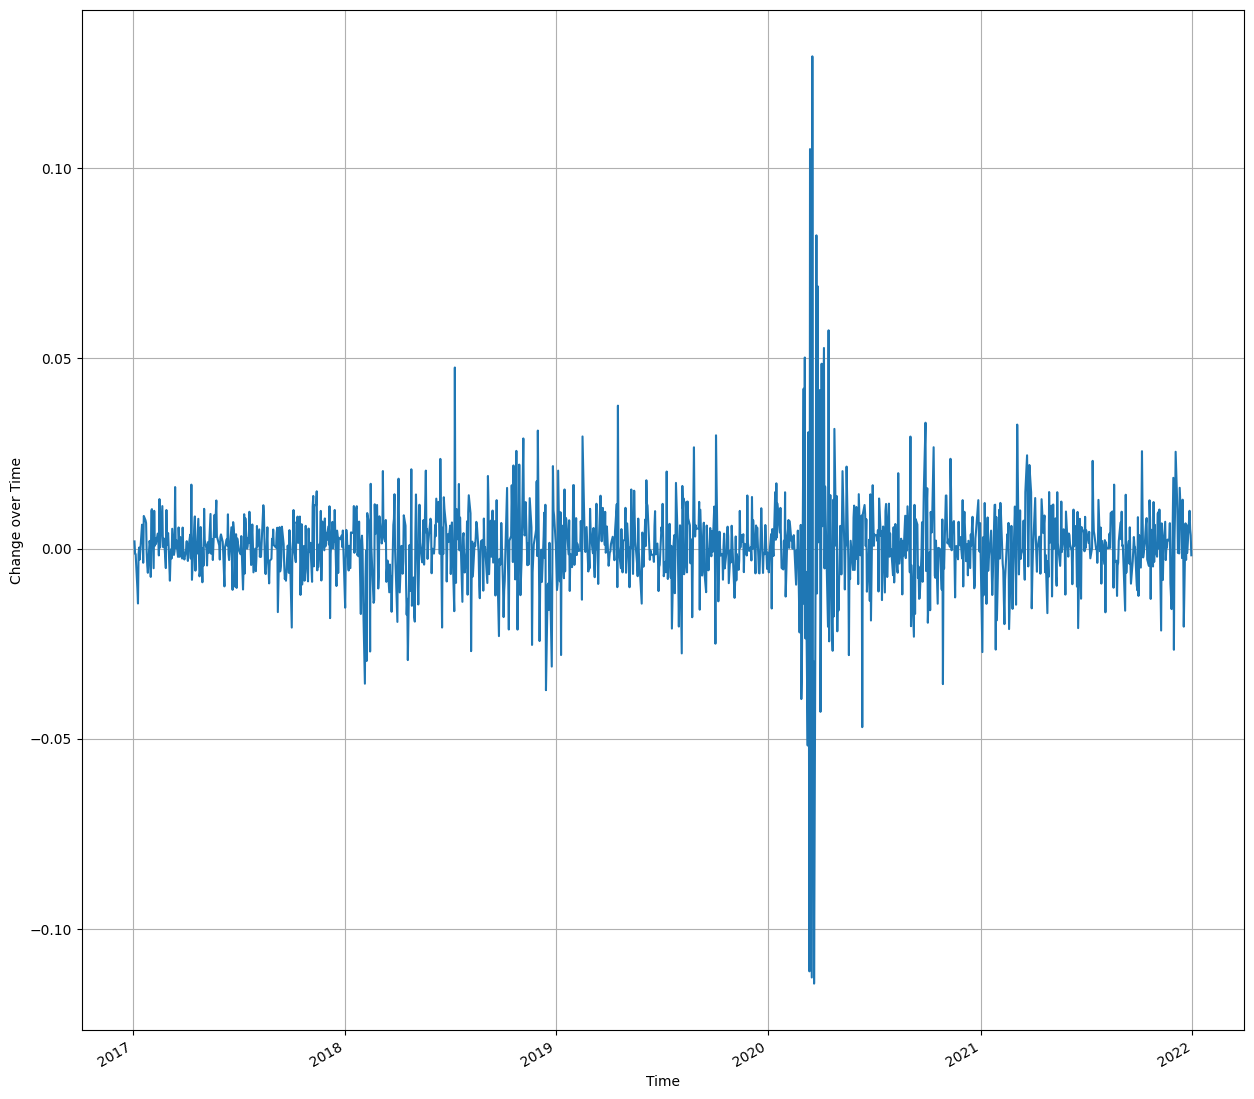

In [ ]:
return_con_data['PEP'].plot(
        grid=True,
        layout=(3,3),
         figsize=(15,15),xlabel='Time',ylabel='Change over Time')
plt.show()

## volatility over time for PEP
Pepsi Co stock has been showing positive trend since 2017, with low instability. However, we see high volatility in 2018 and 2020 but again going on positive trend towards the end of 2022.

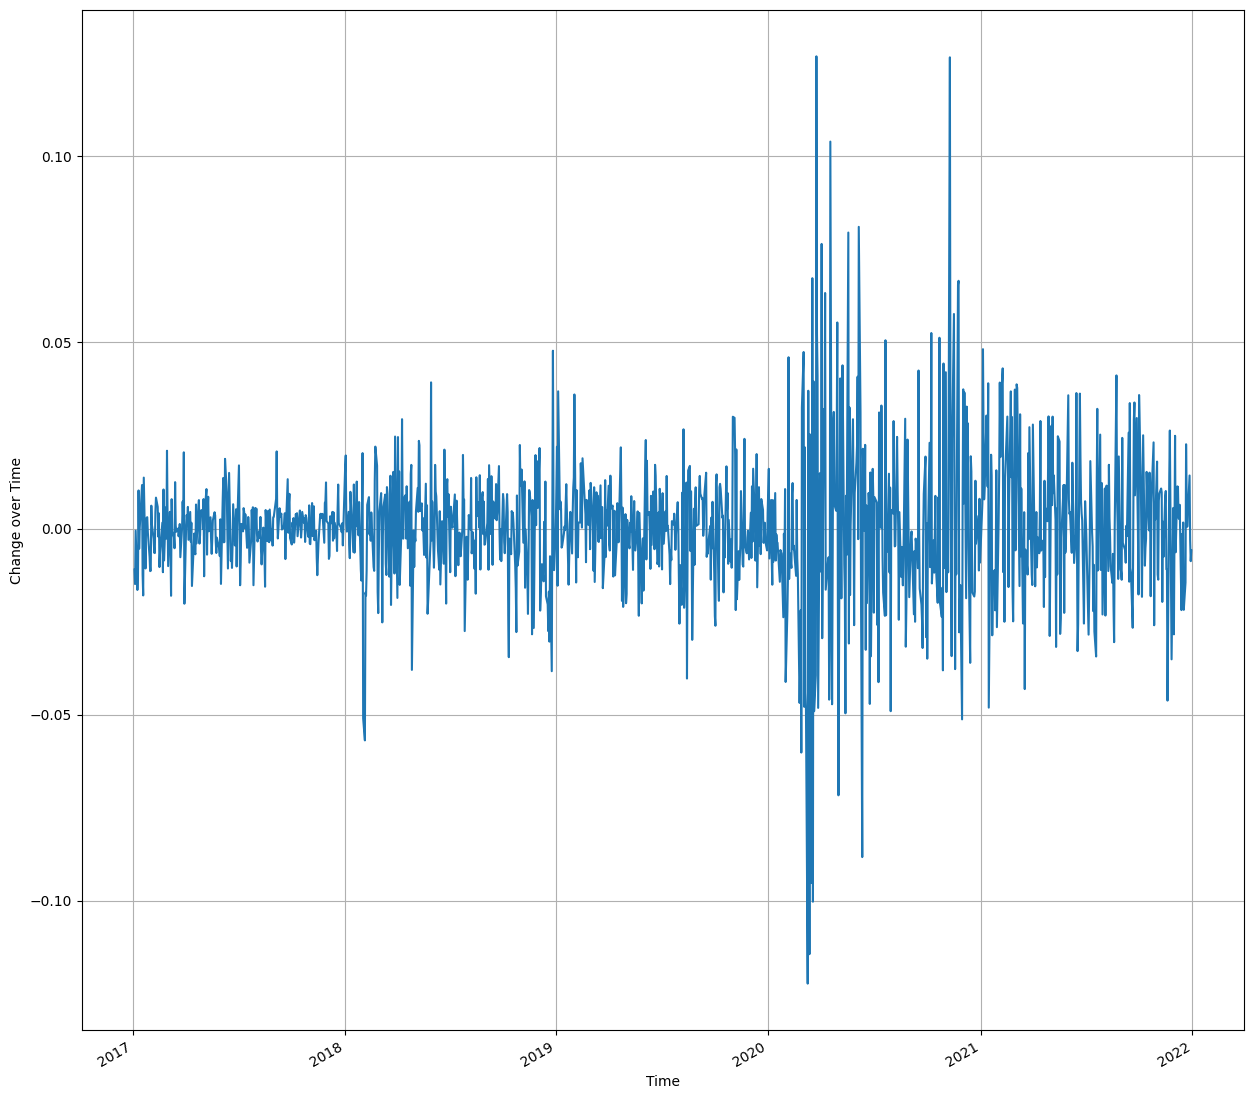

In [ ]:
return_energy_data['XOM'].plot(
        grid=True,
        layout=(3,3),
         figsize=(15,15),xlabel='Time',ylabel='Change over Time')
plt.show()

##Volatility Trends in XOM

Exxon Mobil Corporation (XOM) exhibits interesting volatility patterns within the energy sector from 2017 to 2021. The stock displays relative stability in the early years, with a notable surge in volatility during 2018. However, XOM appears to regain stability in the subsequent years, showing resilience amid market fluctuations. A comprehensive analysis of XOM's volatility trends offers valuable insights for us in the energy sector.

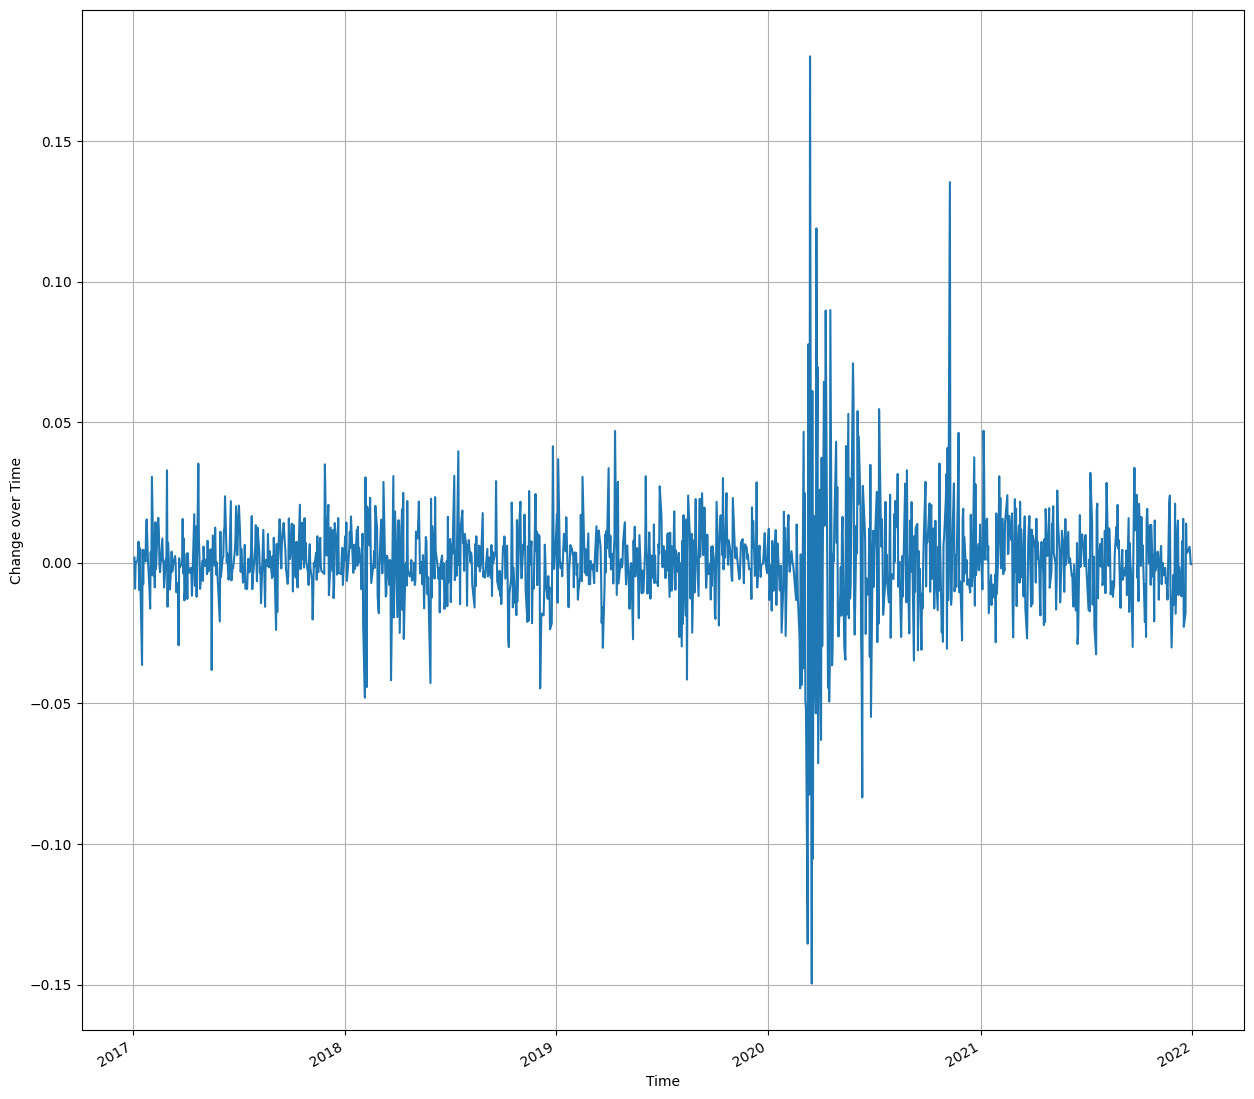

In [ ]:
return_fin_data['JPM'].plot(
        grid=True,
        layout=(3,4),
         figsize=(15,15),xlabel='Time',ylabel='Change over Time')
plt.show()

##Volatility Patterns in JPM

JPMorgan Chase & Co. (JPM) emerges as a compelling choice within the financials sector, showcasing intriguing volatility dynamics from 2017 to 2021. The stock experiences relatively low volatility in the initial years, with a notable spike during specific periods, providing a nuanced view of its market behavior. JPM's overall trend and volatility patterns contribute to its significance in the financial sector, offering us valuable information for strategic decision-making.

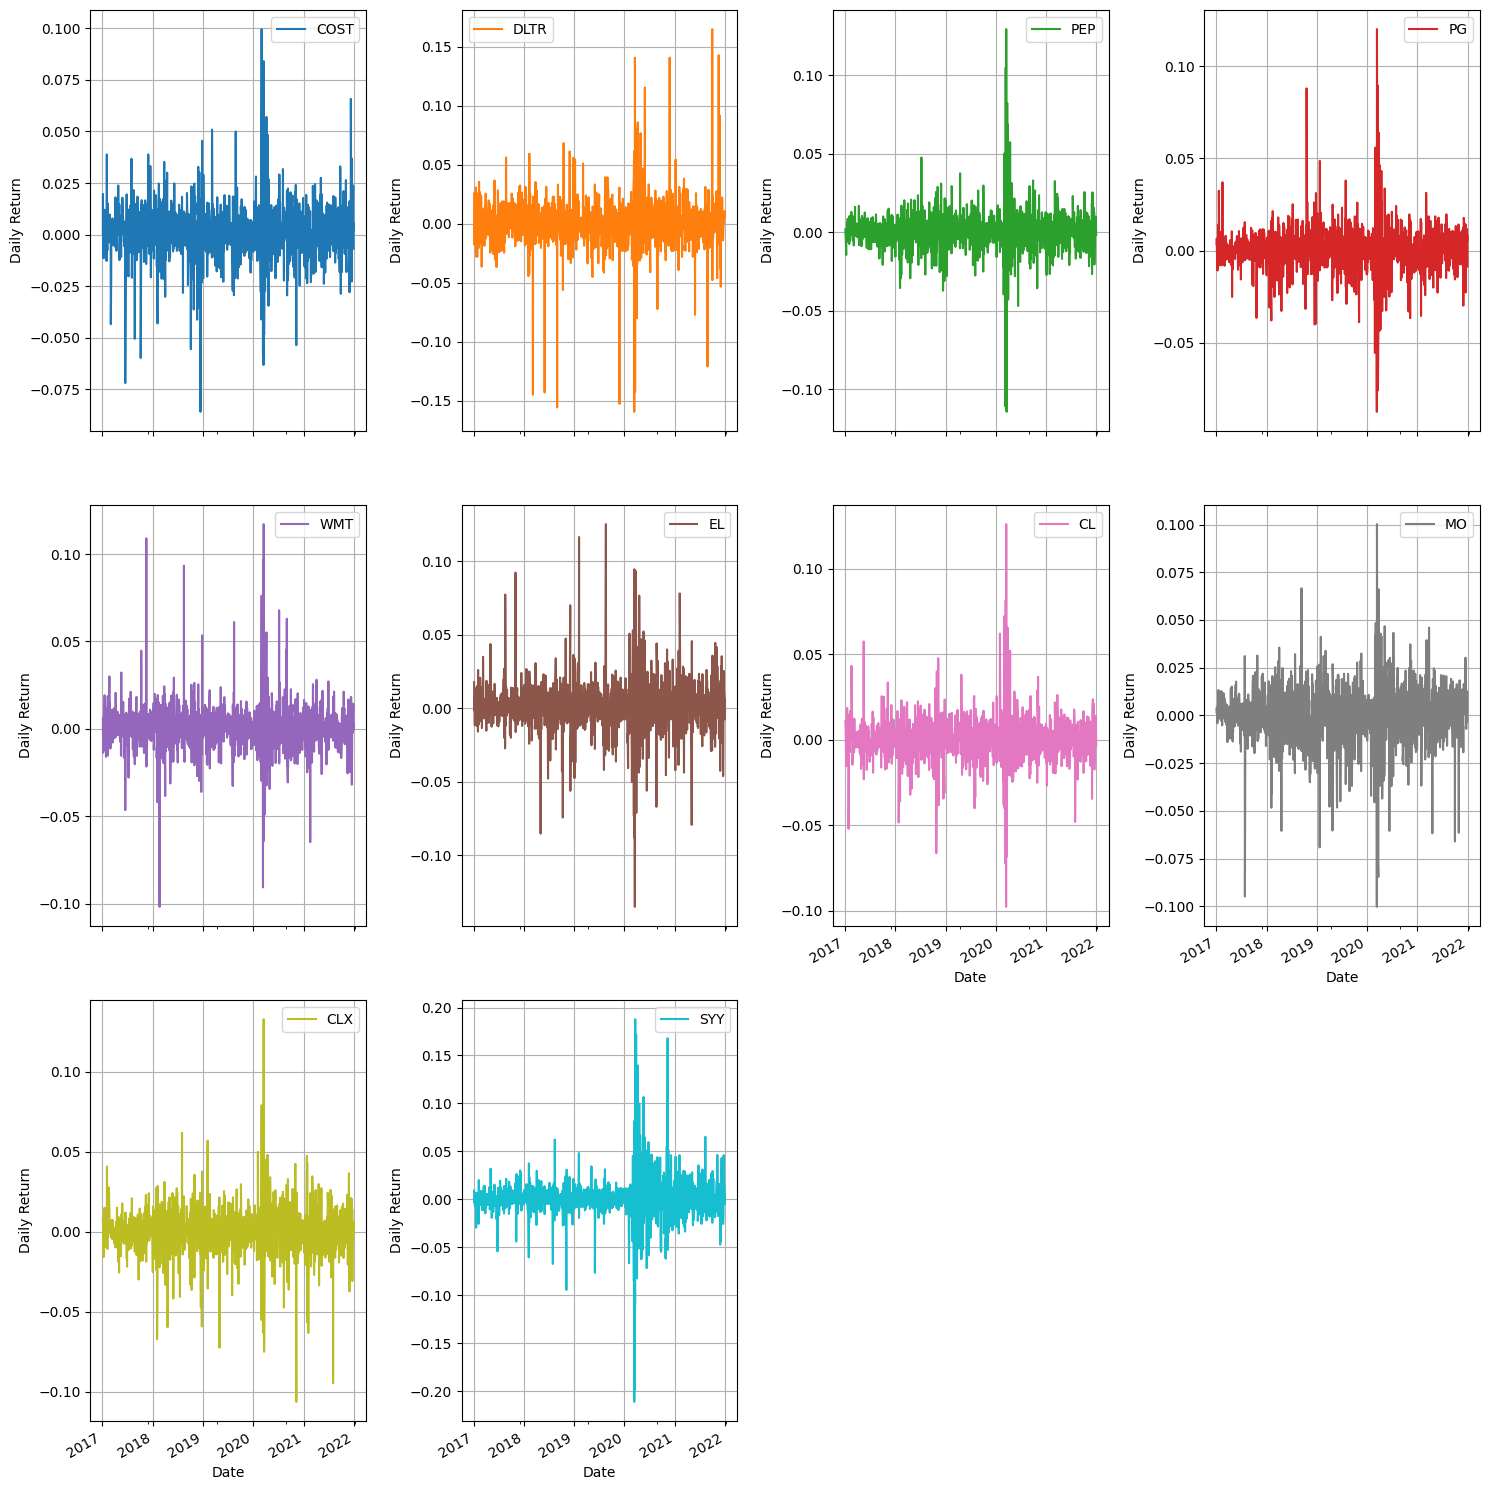

In [ ]:
#Plot of Date vs Daily Return for all stocks
return_con_data.plot(subplots=True,
        grid=True,
        xlabel = 'Date',
        ylabel = 'Daily Return',
        layout=(3,4),
         figsize=(15,15))
plt.tight_layout()
plt.show()

## MOMENTUM TRADING FOR STOCK SELECTION

In [ ]:
# Convert the index to datetime format
con_data.index = pd.to_datetime(con_data.index)
energy_data.index = pd.to_datetime(energy_data.index)
fin_data.index = pd.to_datetime(fin_data.index)

# Extract data for the year 2021
con_data_2021 = con_data.loc['2021-01-01':'2021-12-31']
energy_data_2021 = energy_data.loc['2021-01-01':'2021-12-31']
fin_data_2021 = fin_data.loc['2021-01-01':'2021-12-31']

# Display the DataFrame for the year 2021
#print(con_data_2021)

con_data_2021.head(10)
energy_data_2021.head(10)
fin_data_2021.head(10)

,JPM,IVZ,GS,DFS,KEY,MA,PRU,SPGI,WFC,V
2021-01-04,115.584236,15.110983,245.939224,83.891541,14.138738,345.628052,65.991417,324.555389,27.759666,213.113312
2021-01-05,116.213158,15.565651,251.442703,84.940079,14.364399,341.625916,66.630600,319.880707,28.535439,209.932648
2021-01-06,121.670052,16.412575,265.011078,89.368217,15.761783,341.753662,70.577995,320.280029,30.554325,208.082977
2021-01-07,125.665581,16.341261,270.672394,91.324852,16.048204,344.461273,70.267044,320.484497,31.245981,209.247574
2021-01-08,125.804337,16.626534,269.215271,90.912933,15.831219,348.389709,69.705597,318.322449,31.021656,210.852570
2021-01-11,127.681870,16.885075,272.695587,89.152893,16.039526,342.826965,69.774696,310.872009,31.068394,208.347229
2021-01-12,129.688904,17.455637,280.472809,89.246521,16.351980,337.628418,71.078987,307.619110,31.722656,204.403214
2021-01-13,129.809128,17.402147,281.150269,90.800591,16.308590,340.985779,71.035797,303.908569,31.591808,204.882751
2021-01-14,130.567535,18.070774,285.725708,92.148697,16.430099,321.885132,72.478287,298.191742,32.479744,197.552582
2021-01-15,128.227539,17.830069,279.359100,91.521446,15.978768,318.271790,72.219154,297.967712,29.946789,197.288315


In [ ]:
#con_data_2021 = con_data_2021.drop(columns=['day'])

Day_con = np.arange(1, len(con_data_2021) + 1) #generate list of trading days fro consumer
Day_energy = np.arange(1, len(energy_data_2021) + 1) #generate list of trading days for energy
Day_fin = np.arange(1, len(con_data_2021) + 1) #generate list of trading days for fin
con_data_2021.insert(0, 'Day', Day_con)
energy_data_2021.insert(0, 'Day', Day_energy)
fin_data_2021.insert(0, 'Day', Day_fin)
con_data_2021



,Day,COST,DLTR,PEP,PG,WMT,EL,CL,MO,CLX,SYY
2021-01-04,1,371.947144,106.940002,132.712128,127.934151,140.390121,246.881271,78.469475,32.952629,183.540543,67.117722
2021-01-05,2,367.632324,107.129997,133.107697,128.751022,139.642822,250.599152,78.646286,32.888081,183.146820,67.544701
2021-01-06,3,362.035767,112.970001,131.479462,130.106293,140.514725,250.124695,76.534027,33.420612,180.766022,70.542770
2021-01-07,4,359.981110,114.750000,131.056320,128.890289,140.505096,250.056946,76.115311,33.711082,179.868652,70.580101
2021-01-08,5,361.957458,112.970001,132.629349,128.834564,140.485947,252.438751,76.627083,33.557793,181.159760,72.410225
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,247,542.603149,137.000000,160.741486,152.354019,135.770416,356.801025,78.796524,40.484325,159.381531,72.836006
2021-12-27,248,555.518311,138.470001,162.341507,154.133545,137.006577,359.998688,79.862503,40.562351,160.376343,73.653229
2021-12-28,249,556.671936,139.289993,163.184113,154.961456,138.972687,358.565582,80.385963,41.073822,161.352356,74.422920
2021-12-29,250,559.757751,140.300003,163.761673,156.246155,138.904572,360.788330,80.814262,41.091164,160.836182,74.061836


In [ ]:
con_data_2021.head()



,Day,COST,DLTR,PEP,PG,WMT,EL,CL,MO,CLX,SYY
2021-01-04,1,371.947144,106.940002,132.712128,127.934151,140.390121,246.881271,78.469475,32.952629,183.540543,67.117722
2021-01-05,2,367.632324,107.129997,133.107697,128.751022,139.642822,250.599152,78.646286,32.888081,183.146820,67.544701
2021-01-06,3,362.035767,112.970001,131.479462,130.106293,140.514725,250.124695,76.534027,33.420612,180.766022,70.542770
2021-01-07,4,359.981110,114.750000,131.056320,128.890289,140.505096,250.056946,76.115311,33.711082,179.868652,70.580101
2021-01-08,5,361.957458,112.970001,132.629349,128.834564,140.485947,252.438751,76.627083,33.557793,181.159760,72.410225


In [ ]:
con_data_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-01-04 to 2021-12-30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     251 non-null    int64  
 1   COST    251 non-null    float64
 2   DLTR    251 non-null    float64
 3   PEP     251 non-null    float64
 4   PG      251 non-null    float64
 5   WMT     251 non-null    float64
 6   EL      251 non-null    float64
 7   CL      251 non-null    float64
 8   MO      251 non-null    float64
 9   CLX     251 non-null    float64
 10  SYY     251 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 23.5 KB


In [ ]:
con_data_2021.describe()

,Day,COST,DLTR,PEP,PG,WMT,EL,CL,MO,CLX,SYY
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,126.000000,412.803359,108.327012,140.286478,130.942540,136.747590,302.146044,74.831583,39.082469,165.381976,73.347310
std,72.601653,66.699002,13.470620,10.826895,8.372072,5.113109,28.319770,2.654284,2.534715,10.317615,3.192450
min,1.000000,305.301910,84.540001,118.794250,114.072098,122.186287,228.349915,69.653366,32.888081,148.137695,64.682938
25%,63.500000,357.839050,99.355000,132.404160,125.657135,134.357079,285.241806,72.901562,37.892870,156.680336,71.126343
50%,126.000000,391.861603,106.139999,139.082947,129.660889,136.733444,304.039215,74.285156,39.701023,165.406235,73.529678
75%,188.500000,452.338058,114.110001,147.484314,135.893433,140.290031,321.004257,77.013405,40.929398,172.487274,75.643021
max,251.000000,559.757751,146.610001,163.761673,156.246155,146.820358,360.788330,80.814262,43.094490,204.518631,80.999199


# Moving Averages

In [ ]:
# Testing
test = pd.DataFrame()
test['9-day'] = con_data_2021['COST'].rolling(8).mean().shift()
test['21-day'] = con_data_2021['COST'].rolling(21).mean().shift()
test.dropna(inplace=True)
test

,9-day,21-day
2021-02-03,349.925350,355.174234
2021-02-04,349.058220,354.012242
2021-02-05,348.406677,353.118277
2021-02-08,347.292652,352.459067
2021-02-09,347.800259,352.115242
...,...,...
2021-12-23,543.709915,536.139102
2021-12-27,542.865738,536.378996
2021-12-28,545.099998,537.024048
2021-12-29,544.996490,537.893040


In [ ]:
columns_to_process_con = con_data_2021.columns[1:]  # Exclude the 'Day' and index columns
columns_to_process_energy = energy_data_2021.columns[1:]  # Exclude the 'Day' and index columns
columns_to_process_fin = fin_data_2021.columns[1:]  # Exclude the 'Day' and index columns
# Creating a new DataFrame to store moving averages
moving_averages_con = pd.DataFrame()
moving_averages_energy = pd.DataFrame()
moving_averages_fin = pd.DataFrame()

# Loop through each column (excluding the first two columns) and calculate moving averages
for column in columns_to_process_con:
    # Calculate 8-day and 21-day moving averages
    moving_averages_con.loc[:, '{}-day-8'.format(column)] = con_data_2021[column].rolling(8).mean().shift()
    moving_averages_con.loc[:, '{}-day-21'.format(column)] = con_data_2021[column].rolling(21).mean().shift()

for column in columns_to_process_energy:
    # Calculate 8-day and 21-day moving averages
    moving_averages_energy.loc[:, '{}-day-8'.format(column)] = energy_data_2021[column].rolling(8).mean().shift()
    moving_averages_energy.loc[:, '{}-day-21'.format(column)] = energy_data_2021[column].rolling(21).mean().shift()

for column in columns_to_process_fin:
    # Calculate 8-day and 21-day moving averages
    moving_averages_fin.loc[:, '{}-day-8'.format(column)] = fin_data_2021[column].rolling(8).mean().shift()
    moving_averages_fin.loc[:, '{}-day-21'.format(column)] = fin_data_2021[column].rolling(21).mean().shift()

# Drop rows with NaN values
moving_averages_con.dropna(inplace=True)
moving_averages_energy.dropna(inplace=True)
moving_averages_fin.dropna(inplace=True)

In [ ]:
#moving_averages. columns. values. tolist()

## Buy-and-Hold

In [ ]:
# Iterate over each stock and calculate the corresponding 'returns' column
stock_names_con = con_data_2021.columns[1:]  # Exclude the 'Day' column
stock_names_energy = energy_data_2021.columns[1:]
stock_names_fin = fin_data_2021.columns[1:]
for stock_name in stock_names_con:
  returns_col_con = f"{stock_name}-return"
  # Calculate log returns
  con_data_2021[returns_col_con] = np.log(con_data_2021[stock_name]).diff()
  # Store the returns column in moving_averages_df
  moving_averages_con[returns_col_con] = con_data_2021[returns_col_con]
for stock_name in stock_names_energy:
  returns_col_energy = f"{stock_name}-return"
  # Calculate log returns
  energy_data_2021[returns_col_energy] = np.log(energy_data_2021[stock_name]).diff()
  # Store the returns column in moving_averages_df
  moving_averages_energy[returns_col_energy] = energy_data_2021[returns_col_energy]
for stock_name in stock_names_fin:
  returns_col_fin = f"{stock_name}-return"
  # Calculate log returns
  fin_data_2021[returns_col_fin] = np.log(fin_data_2021[stock_name]).diff()
  # Store the returns column in moving_averages_df
  moving_averages_fin[returns_col_fin] = fin_data_2021[returns_col_fin]











<ipython-input-179-5dccee1893ee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  con_data_2021[returns_col_con] = np.log(con_data_2021[stock_name]).diff()
<ipython-input-179-5dccee1893ee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  con_data_2021[returns_col_con] = np.log(con_data_2021[stock_name]).diff()
<ipython-input-179-5dccee1893ee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [ ]:
#returns_columns = [col for col in moving_averages_df.columns if '-return' in col]
#moving_averages_df = moving_averages_df.drop(columns=returns_columns)
moving_averages_con. columns. values. tolist()
moving_averages_energy. columns. values. tolist()
moving_averages_fin. columns. values. tolist()

['JPM-day-8',
 'JPM-day-21',
 'IVZ-day-8',
 'IVZ-day-21',
 'GS-day-8',
 'GS-day-21',
 'DFS-day-8',
 'DFS-day-21',
 'KEY-day-8',
 'KEY-day-21',
 'MA-day-8',
 'MA-day-21',
 'PRU-day-8',
 'PRU-day-21',
 'SPGI-day-8',
 'SPGI-day-21',
 'WFC-day-8',
 'WFC-day-21',
 'V-day-8',
 'V-day-21',
 'JPM-return',
 'IVZ-return',
 'GS-return',
 'DFS-return',
 'KEY-return',
 'MA-return',
 'PRU-return',
 'SPGI-return',
 'WFC-return',
 'V-return']

### MTStrategy - Invested

In [ ]:

#List of stock names by extracting the prefix before '-day-'
stock_names_con = set(col.split('-')[0] for col in moving_averages_con.columns)
stock_names_energy = set(col.split('-')[0] for col in moving_averages_energy.columns)
stock_names_fin = set(col.split('-')[0] for col in moving_averages_fin.columns)



# Iterate over each stock and create the corresponding 'invested' column
for stock_name in stock_names_con:
    day_8_col = f"{stock_name}-day-8"
    day_21_col = f"{stock_name}-day-21"

    invested_col = f"{stock_name}-invested"

    moving_averages_con[invested_col] = np.where(moving_averages_con[day_8_col] > moving_averages_con[day_21_col], 1, 0)

for stock_name in stock_names_energy:
    day_8_col = f"{stock_name}-day-8"
    day_21_col = f"{stock_name}-day-21"

    invested_col = f"{stock_name}-invested"

    moving_averages_energy[invested_col] = np.where(moving_averages_energy[day_8_col] > moving_averages_energy[day_21_col], 1, 0)

for stock_name in stock_names_fin:
    day_8_col = f"{stock_name}-day-8"
    day_21_col = f"{stock_name}-day-21"

    invested_col = f"{stock_name}-invested"

    moving_averages_fin[invested_col] = np.where(moving_averages_fin[day_8_col] > moving_averages_fin[day_21_col], 1, 0)

In [ ]:
moving_averages_fin.shape

(230, 40)

In [ ]:
# Value counts for each 'invested' column
for stock_name in stock_names_con:
    invested_col = f"{stock_name}-invested"
    value_counts_con = moving_averages_con[invested_col].value_counts()

    print(value_counts_con)

for stock_name in stock_names_energy:
    invested_col = f"{stock_name}-invested"
    value_counts_energy = moving_averages_energy[invested_col].value_counts()

    print(value_counts_energy)

for stock_name in stock_names_fin:
    invested_col = f"{stock_name}-invested"
    value_counts_fin = moving_averages_fin[invested_col].value_counts()

    print(value_counts_fin)

1    170
0     60
Name: COST-invested, dtype: int64
0    117
1    113
Name: SYY-invested, dtype: int64
1    162
0     68
Name: PEP-invested, dtype: int64
1    125
0    105
Name: WMT-invested, dtype: int64
0    127
1    103
Name: CL-invested, dtype: int64
1    122
0    108
Name: DLTR-invested, dtype: int64
1    150
0     80
Name: PG-invested, dtype: int64
1    137
0     93
Name: MO-invested, dtype: int64
1    151
0     79
Name: EL-invested, dtype: int64
0    129
1    101
Name: CLX-invested, dtype: int64
0    127
1    103
Name: CTRA-invested, dtype: int64
1    156
0     74
Name: OKE-invested, dtype: int64
1    117
0    113
Name: HES-invested, dtype: int64
1    125
0    105
Name: APA-invested, dtype: int64
1    121
0    109
Name: WMB-invested, dtype: int64
1    148
0     82
Name: DVN-invested, dtype: int64
0    135
1     95
Name: PSX-invested, dtype: int64
1    150
0     80
Name: FANG-invested, dtype: int64
1    124
0    106
Name: XOM-invested, dtype: int64
0    115
1    115
Name: VLO-inv

## Entering and leaving the market using the momentum trading strategy
Now we make a column called 'signal' which tells you when you enter and leave the market based on the momentum trading strategy. Remember that we want to buy/sell at the transition points, i.e., when the plots are intersecting and the trend is changing.

A value of +1 indicates that we should buy, and a value of -1 indicates that we should sell. Observe that this happens when the trend flips.

In [ ]:
#Signal column indicator

for stock_name in stock_names_con:
    invested_col = f"{stock_name}-invested"
    signal = f"{stock_name}-signal"

    moving_averages_con[signal] = moving_averages_con[invested_col].diff()
    moving_averages_con.at[moving_averages_con.index[0], signal] = 1.0  # Set NaN in the first row to 1.0

# Display the modified DataFrame with the 'signal' columns
print(moving_averages_con.head(10))

for stock_name in stock_names_energy:
    invested_col = f"{stock_name}-invested"
    signal = f"{stock_name}-signal"

    moving_averages_energy[signal] = moving_averages_energy[invested_col].diff()
    moving_averages_energy.at[moving_averages_energy.index[0], signal] = 1.0  # Set NaN in the first row to 1.0

# Display the modified DataFrame with the 'signal' columns
print(moving_averages_energy.head(10))

for stock_name in stock_names_fin:
    invested_col = f"{stock_name}-invested"
    signal = f"{stock_name}-signal"

    moving_averages_fin[signal] = moving_averages_fin[invested_col].diff()
    moving_averages_fin.at[moving_averages_con.index[0], signal] = 1.0  # Set NaN in the first row to 1.0

# Display the modified DataFrame with the 'signal' columns
print(moving_averages_con.head(10))
print(moving_averages_energy.head(10))
print(moving_averages_fin.head(10))


            COST-day-8  COST-day-21  DLTR-day-8  DLTR-day-21   PEP-day-8  \
2021-02-03  349.925350   355.174234  103.865000   107.926191  127.603310   
2021-02-04  349.058220   354.012242  103.497500   107.830953  127.537774   
2021-02-05  348.406677   353.118277  103.468750   107.783810  127.480283   
2021-02-08  347.292652   352.459067  103.462501   107.435238  127.383695   
2021-02-09  347.800259   352.115242  104.151251   107.069524  127.655065   
2021-02-10  348.192844   351.664700  105.020000   106.919524  127.702207   
2021-02-11  348.730141   351.329856  106.093750   106.815715  127.832141   
2021-02-12  349.020664   350.803159  107.122499   106.573333  127.601021   
2021-02-16  348.759739   350.174007  107.667500   106.378571  127.082432   
2021-02-17  348.697247   349.817535  108.006249   106.268095  126.663877   

            PEP-day-21    PG-day-8   PG-day-21   WMT-day-8  WMT-day-21  ...  \
2021-02-03  129.683951  121.407645  124.684482  137.506269  139.127276  ...   
2021-

In [ ]:
## Checking Trading days data
for stock_name in stock_names_con:
    signal_col = f"{stock_name}-signal"

    # Filter the DataFrame for rows where 'signal' column has values of 1 or -1
    trading_days_con = moving_averages_con[moving_averages_con[signal_col].isin([1.0, -1.0])]
    #print(trading_days_con)

for stock_name in stock_names_energy:
    signal_col = f"{stock_name}-signal"

    # Filter the DataFrame for rows where 'signal' column has values of 1 or -1
    trading_days_energy = moving_averages_energy[moving_averages_energy[signal_col].isin([1.0, -1.0])]
    #print(trading_days_energy)

for stock_name in stock_names_fin:
    signal_col = f"{stock_name}-signal"

    # Filter the DataFrame for rows where 'signal' column has values of 1 or -1
    trading_days_fin = moving_averages_fin[moving_averages_fin[signal_col].isin([1.0, -1.0])]
    #print(trading_days_fin)

In [ ]:
##System Returns with Momentum Trading

# Iterate over each stock and calculate the corresponding 'system_return' column
stock_names_con = set(col.split('-')[0] for col in moving_averages_con.columns)
for stock_name in stock_names_con:
    return_col = f"{stock_name}-return"
    invested_col = f"{stock_name}-invested"
    system_return_col = f"{stock_name}-system_return"

    # Calculate the 'system_return' column
    moving_averages_con[system_return_col] = moving_averages_con[invested_col] * moving_averages_con[return_col]

for stock_name in stock_names_energy:
    return_col = f"{stock_name}-return"
    invested_col = f"{stock_name}-invested"
    system_return_col = f"{stock_name}-system_return"

    # Calculate the 'system_return' column
    moving_averages_energy[system_return_col] = moving_averages_energy[invested_col] * moving_averages_energy[return_col]

for stock_name in stock_names_fin:
    return_col = f"{stock_name}-return"
    invested_col = f"{stock_name}-invested"
    system_return_col = f"{stock_name}-system_return"

    # Calculate the 'system_return' column
    moving_averages_fin[system_return_col] = moving_averages_fin[invested_col] * moving_averages_fin[return_col]


 #Display the modified moving_averages DataFrame with the 'system_return' columns
print("Consumer Staples:")
print(moving_averages_con.filter(regex='-system_return'))

# Display the data frame for Energy
print("\nEnergy:")
print(moving_averages_energy.filter(regex='-system_return'))

# Display the data frame for Financials
print("\nFinancials:")
print(moving_averages_fin.filter(regex='-system_return'))


Consumer Staples:
            COST-system_return  SYY-system_return  PEP-system_return  \
2021-02-03           -0.000000           0.000000          -0.000000   
2021-02-04            0.000000           0.000000           0.000000   
2021-02-05           -0.000000           0.000000           0.000000   
2021-02-08            0.000000          -0.000000          -0.000000   
2021-02-09           -0.000000          -0.000000          -0.000000   
...                        ...                ...                ...   
2021-12-23            0.001273           0.018168          -0.001118   
2021-12-27            0.023523           0.011158           0.009905   
2021-12-28            0.002075           0.010396           0.005177   
2021-12-29            0.005528          -0.004864           0.003533   
2021-12-30           -0.006822           0.000769          -0.001736   

            WMT-system_return  CL-system_return  DLTR-system_return  \
2021-02-03           0.000000          0.00000

In [ ]:


total_returns_con = {}
total_returns_energy = {}
total_returns_fin = {}

for stock_name in stock_names_con:
    system_return_col = f"{stock_name}-system_return"

    # Calculate the total return for each stock for Consumer Staple
    total_return = np.exp(np.sum(moving_averages_con[system_return_col])) - 1
    total_returns_con[stock_name] = total_return

# Display the total returns for each stock in descending order
sorted_total_returns_con = sorted(total_returns_con.items(), key=lambda x: x[1], reverse=True)
for stock_name, total_return in sorted_total_returns_con:
    print(f"Stock: {stock_name}, Total Return: {total_return:.4f}")
print('--------------------')

for stock_name in stock_names_energy:
    system_return_col = f"{stock_name}-system_return"

    # Calculate the total return for each stock for Energy
    total_return = np.exp(np.sum(moving_averages_energy[system_return_col])) - 1
    total_returns_energy[stock_name] = total_return

# Display the total returns for each stock in descending order
sorted_total_returns_energy = sorted(total_returns_energy.items(), key=lambda x: x[1], reverse=True)
for stock_name, total_return in sorted_total_returns_energy:
    print(f"Stock: {stock_name}, Total Return: {total_return:.4f}")
print('--------------------')


for stock_name in stock_names_fin:
    system_return_col = f"{stock_name}-system_return"

    # Calculate the total return for each stock for Financial
    total_return = np.exp(np.sum(moving_averages_fin[system_return_col])) - 1
    total_returns_fin[stock_name] = total_return

# Display the total returns for each stock in descending order
sorted_total_returns_fin = sorted(total_returns_fin.items(), key=lambda x: x[1], reverse=True)
for stock_name, total_return in sorted_total_returns_fin:
    print(f"Stock: {stock_name}, Total Return: {total_return:.4f}")



Stock: COST, Total Return: 0.6128
Stock: PEP, Total Return: 0.1738
Stock: PG, Total Return: 0.1718
Stock: DLTR, Total Return: 0.1684
Stock: SYY, Total Return: 0.1054
Stock: CL, Total Return: 0.1003
Stock: MO, Total Return: 0.0937
Stock: EL, Total Return: 0.0341
Stock: WMT, Total Return: 0.0309
Stock: CLX, Total Return: -0.1618
--------------------
Stock: DVN, Total Return: 0.9510
Stock: HES, Total Return: 0.4494
Stock: FANG, Total Return: 0.4459
Stock: OKE, Total Return: 0.3308
Stock: WMB, Total Return: 0.3266
Stock: APA, Total Return: 0.2898
Stock: XOM, Total Return: 0.1315
Stock: PSX, Total Return: 0.1198
Stock: VLO, Total Return: 0.0889
Stock: CTRA, Total Return: -0.2632
--------------------
Stock: WFC, Total Return: 0.4231
Stock: PRU, Total Return: 0.3585
Stock: SPGI, Total Return: 0.2712
Stock: KEY, Total Return: 0.2540
Stock: GS, Total Return: 0.1644
Stock: JPM, Total Return: 0.1104
Stock: IVZ, Total Return: 0.0600
Stock: V, Total Return: 0.0297
Stock: DFS, Total Return: 0.0079
S

### Analysis:
#In the Consumer Staples sector COSTCO ('COST'), Pespi ('PEP'), and Procter & Gamble ('PG') has the highest returns using the Momentum Trading Strategy.
#In the Energy sector Devon Energy ('DVN'), Hess ('HES'), and Diamondback Energy ('FANG') has the highest returns using the Momentum Trading Strategy.
#In the Energy sector Wells Fargo ('WFC'), Prudential Financial ('PRU'), and S&P Global ('SPGI') has the highest returns using the Momentum Trading Strategy.

<Axes: >

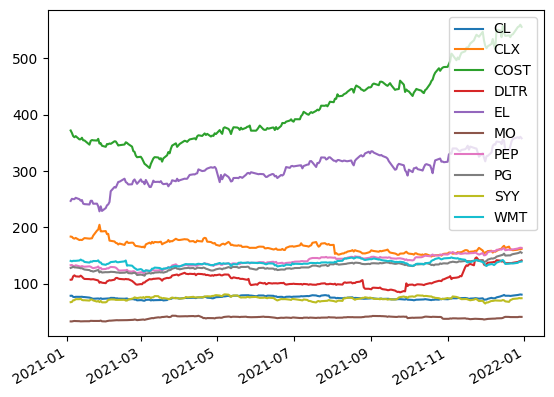

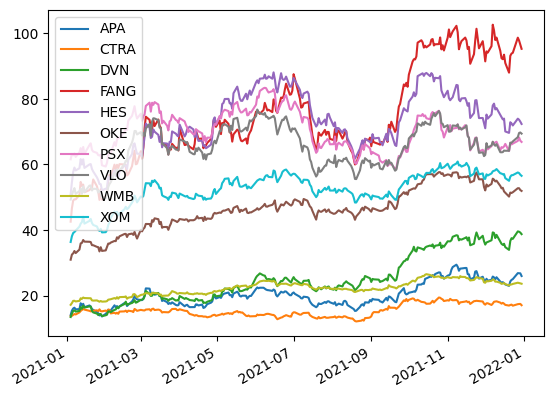

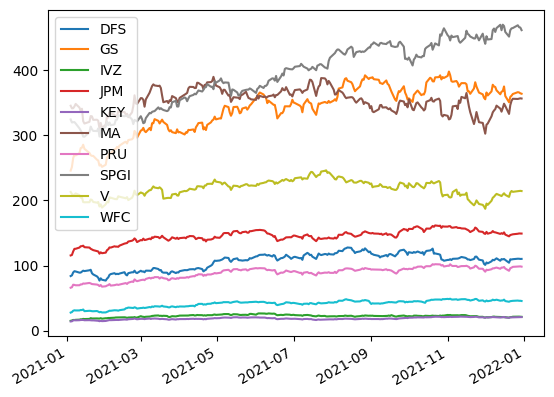

In [ ]:
exclude_con = ['Day','CL-return','CLX-return','COST-return','DLTR-return','EL-return','MO-return','PEP-return','PG-return','SYY-return','WMT-return']
con_data_2021.loc[:, con_data_2021.columns.difference(exclude_con)].plot()

exclude_energy = ['Day','HES-return','PSX-return','DVN-return','CTRA-return','WMB-return','FANG-return','XOM-return','APA-return','OKE-return','VLO-return']
energy_data_2021.loc[:, energy_data_2021.columns.difference(exclude_energy)].plot()

exclude_fin = ['Day','V-return','JPM-return','IVZ-return','GS-return','DFS-return','KEY-return','MA-return','PRU-return','SPGI-return','WFC-return']
fin_data_2021.loc[:, fin_data_2021.columns.difference(exclude_fin)].plot()



In [ ]:
# # creating return features for each ticker in Consumer Staples Sector
# # we will use a pct_change - shows the fractional change in values over a series of time. Unline the name for % change we have to multiply by 100
# return_con_data = pd.DataFrame()
# # Previously for "i in tickers_list:" now: below changed because we did not declare "tickers_list" in previous chunks of code.
# for i in con_tickers:
#   return_con_data[i] = con_data[i].pct_change()
# # drop the na records
# return_con_data.dropna(inplace=True)
# return_con_data


# # creating return features for each ticker in Energy Sector
# return_energy_data = pd.DataFrame()
# for i in energy_tickers:
#   return_energy_data[i] = energy_data[i].pct_change()
# # drop the na records
# return_energy_data.dropna(inplace=True)
# return_energy_data


# # creating return features for each ticker in Financials Sector
# return_fin_data = pd.DataFrame()
# for i in fin_tickers:
#   return_fin_data[i] = fin_data[i].pct_change()
# # drop the na records
# return_fin_data.dropna(inplace=True)
# return_fin_data

# return_con_data.plot(
#         grid=True,
#         layout=(3,4),
#          figsize=(15,15),xlabel='Time',ylabel='Change over Time')
# plt.show()

# return_energy_data.plot(
#         grid=True,
#         layout=(3,4),
#          figsize=(15,15),xlabel='Time',ylabel='Change over Time')
# plt.show()

# return_fin_data.plot(
#         grid=True,
#         layout=(3,4),
#          figsize=(15,15),xlabel='Time',ylabel='Change over Time')
# plt.show()

# Modern Portfolio Theory

### Top 3 stocks selection

In [ ]:
import pandas as pd

# Assuming you have already calculated and obtained the sorted_total_returns_con, sorted_total_returns_energy, and sorted_total_returns_fin lists

# Function to convert the top stocks information into a DataFrame
def get_top_stocks_data(top_stocks_info):
    data = {'Stock': [], 'Total Return': []}
    for stock_name, total_return in top_stocks_info[:3]:
        data['Stock'].append(stock_name)
        data['Total Return'].append(total_return)
    return pd.DataFrame(data)

# Display the top 3 stocks in Consumer Staples
print("Top Consumer Staples Stocks:")
top_stocks_con = get_top_stocks_data(sorted_total_returns_con)
print(top_stocks_con)

# Display the top 3 stocks in Energy
print("\nTop Energy Stocks:")
top_stocks_energy = get_top_stocks_data(sorted_total_returns_energy)
print(top_stocks_energy)

# Display the top 3 stocks in Financials
print("\nTop Financials Stocks:")
top_stocks_fin = get_top_stocks_data(sorted_total_returns_fin)
print(top_stocks_fin)



Top Consumer Staples Stocks:
  Stock  Total Return
0  COST      0.612824
1   PEP      0.173808
2    PG      0.171756

Top Energy Stocks:
  Stock  Total Return
0   DVN      0.951010
1   HES      0.449424
2  FANG      0.445885

Top Financials Stocks:
  Stock  Total Return
0   WFC      0.423135
1   PRU      0.358506
2  SPGI      0.271244


In [ ]:
# Extract the data of the top stocks for each sector
top_stocks_con_data = return_con_data[top_stocks_con]
top_stocks_energy_data = return_energy_data[top_stocks_energy]
top_stocks_fin_data = return_fin_data[top_stocks_fin]

# Concatenate the data frames vertically
all_top_stocks_data = pd.concat([top_stocks_con_data, top_stocks_energy_data, top_stocks_fin_data], axis=1)

# Print the resulting DataFrame
print(all_top_stocks_data)


            COST  DLTR  PEP  PG  WMT  EL  CL  MO  CLX  SYY  ...  JPM  IVZ  GS  \
2017-01-04   NaN   NaN  NaN NaN  NaN NaN NaN NaN  NaN  NaN  ...  NaN  NaN NaN   
2017-01-05   NaN   NaN  NaN NaN  NaN NaN NaN NaN  NaN  NaN  ...  NaN  NaN NaN   
2017-01-06   NaN   NaN  NaN NaN  NaN NaN NaN NaN  NaN  NaN  ...  NaN  NaN NaN   
2017-01-09   NaN   NaN  NaN NaN  NaN NaN NaN NaN  NaN  NaN  ...  NaN  NaN NaN   
2017-01-10   NaN   NaN  NaN NaN  NaN NaN NaN NaN  NaN  NaN  ...  NaN  NaN NaN   
...          ...   ...  ...  ..  ...  ..  ..  ..  ...  ...  ...  ...  ...  ..   
2021-12-23   NaN   NaN  NaN NaN  NaN NaN NaN NaN  NaN  NaN  ...  NaN  NaN NaN   
2021-12-27   NaN   NaN  NaN NaN  NaN NaN NaN NaN  NaN  NaN  ...  NaN  NaN NaN   
2021-12-28   NaN   NaN  NaN NaN  NaN NaN NaN NaN  NaN  NaN  ...  NaN  NaN NaN   
2021-12-29   NaN   NaN  NaN NaN  NaN NaN NaN NaN  NaN  NaN  ...  NaN  NaN NaN   
2021-12-30   NaN   NaN  NaN NaN  NaN NaN NaN NaN  NaN  NaN  ...  NaN  NaN NaN   

            DFS  KEY  MA  P

In [ ]:
import pandas as pd

# Assuming moving_averages_con, moving_averages_energy, and moving_averages_fin are dataframes

# Function to calculate total returns and add a 'month' column
def calculate_total_returns(df, sector_name):
    df['month'] = df.index.to_period('M')  # Add a 'month' column

    # Iterate over each stock and calculate the total return for the sector
    stock_names = set(col.split('-')[0] for col in df.columns if '-system_return' in col)
    total_returns = {}

    for stock_name in stock_names:
        system_return_col = f"{stock_name}-system_return"
        total_returns[stock_name] = df.groupby('month')[system_return_col].sum()

    # Combine total returns into a dataframe
    df_total_returns = pd.DataFrame(total_returns)

    # Display the total returns for each stock in descending order
    sorted_total_returns = df_total_returns.sum(axis=1).sort_values(ascending=False)
    print(f"{sector_name} Total Returns:")
    print(sorted_total_returns)
    print('\n')

# Calculate and display total returns for each sector
calculate_total_returns(moving_averages_con, "Consumer Staples")
calculate_total_returns(moving_averages_energy, "Energy")
calculate_total_returns(moving_averages_fin, "Financials")




Consumer Staples Total Returns:
month
2021-12    0.396912
2021-03    0.387356
2021-11    0.286076
2021-07    0.233742
2021-10    0.131164
2021-04    0.123630
2021-08   -0.011753
2021-06   -0.054437
2021-05   -0.074900
2021-02   -0.119448
2021-09   -0.173236
Freq: M, dtype: float64


Energy Total Returns:
month
2021-09    1.056238
2021-10    0.884890
2021-02    0.740217
2021-05    0.331972
2021-06    0.173083
2021-03    0.172441
2021-11    0.041243
2021-04   -0.035956
2021-12   -0.304450
2021-07   -0.340237
2021-08   -0.472044
Freq: M, dtype: float64


Financials Total Returns:
month
2021-04    0.570542
2021-02    0.463487
2021-08    0.283864
2021-03    0.265886
2021-05    0.238479
2021-10    0.220255
2021-07    0.090514
2021-12   -0.016303
2021-06   -0.186207
2021-09   -0.209579
2021-11   -0.294244
Freq: M, dtype: float64




In [ ]:
# import pandas as pd

# # Assuming moving_averages_con, moving_averages_energy, and moving_averages_fin are dataframes

# # Function to calculate total returns and add a 'month' column
# def calculate_total_returns(df, sector_name):
#     df['month'] = df.index.to_period('M')  # Add a 'month' column

#     # Iterate over each stock and calculate the total return for the sector
#     stock_names = set(col.split('-')[0] for col in df.columns if '-system_return' in col)
#     total_returns = {}

#     for stock_name in stock_names:
#         system_return_col = f"{stock_name}-system_return"
#         total_returns[stock_name] = df.groupby('month')[system_return_col].sum()

#     # Combine total returns into a dataframe
#     df_total_returns = pd.DataFrame(total_returns)

#     # Display the total returns for each stock in descending order
#     sorted_total_returns = df_total_returns.sum(axis=1).sort_values(ascending=False)
#     return sorted_total_returns

# # Calculate and combine total returns for each sector
# total_returns_con = calculate_total_returns(moving_averages_con, "Consumer Staples")
# total_returns_energy = calculate_total_returns(moving_averages_energy, "Energy")
# total_returns_fin = calculate_total_returns(moving_averages_fin, "Financials")

# # Combine the dataframes into one based on the 'month' column
# df_combined = pd.concat([total_returns_con, total_returns_energy, total_returns_fin], axis=1)

# # Display the combined dataframe
# print("Combined Total Returns:")
# print(df_combined)



In [ ]:

# Function to calculate total returns and add a 'month' column
def calculate_total_returns(df, sector_name):
    df['month'] = df.index.to_period('M')  # Add a 'month' column

    # Iterate over each stock and calculate the total return for the sector
    stock_names = set(col.split('-')[0] for col in df.columns if '-system_return' in col)
    total_returns = {}

    for stock_name in stock_names:
        system_return_col = f"{stock_name}-system_return"
        total_returns[stock_name] = df.groupby('month')[system_return_col].sum()

    # Combine total returns into a dataframe
    df_total_returns = pd.DataFrame(total_returns)

    # Display the total returns for each stock in descending order
    sorted_total_returns = df_total_returns.sum(axis=1).sort_values(ascending=False)
    return sorted_total_returns

# Calculate and combine total returns for each sector
total_returns_con = calculate_total_returns(moving_averages_con, "Consumer Staples")
total_returns_energy = calculate_total_returns(moving_averages_energy, "Energy")
total_returns_fin = calculate_total_returns(moving_averages_fin, "Financials")

# Combine the dataframes into one based on the 'month' column
df_combined = pd.concat([total_returns_con, total_returns_energy, total_returns_fin], axis=1)

# Rename the columns with sector names
df_combined.columns = ["Consumer Staples", "Energy", "Financials"]

# Display the combined dataframe
print("Combined Total Returns:")
print(df_combined)


Combined Total Returns:
         Consumer Staples    Energy  Financials
month                                          
2021-12          0.396912 -0.304450   -0.016303
2021-03          0.387356  0.172441    0.265886
2021-11          0.286076  0.041243   -0.294244
2021-07          0.233742 -0.340237    0.090514
2021-10          0.131164  0.884890    0.220255
2021-04          0.123630 -0.035956    0.570542
2021-08         -0.011753 -0.472044    0.283864
2021-06         -0.054437  0.173083   -0.186207
2021-05         -0.074900  0.331972    0.238479
2021-02         -0.119448  0.740217    0.463487
2021-09         -0.173236  1.056238   -0.209579


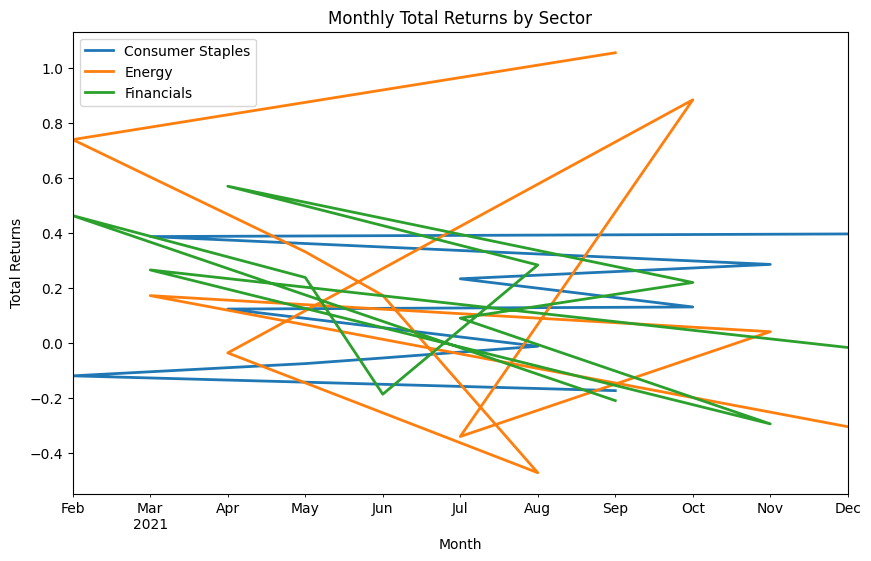

In [ ]:
import matplotlib.pyplot as plt

# Plot the performance for each sector as a line graph
df_combined.plot(figsize=(10, 6), linewidth=2)

plt.title('Monthly Total Returns by Sector')
plt.xlabel('Month')
plt.ylabel('Total Returns')
plt.legend(loc='upper left')

plt.show()



# Covariance and Modern Portfolio Theory
Read this first: https://www.investopedia.com/articles/financial-theory/11/calculating-covariance.asp

Then read this: https://www.investopedia.com/ask/answers/041315/how-covariance-used-portfolio-theory.asp

A way that we can balance our portfolio is to look at how different stocks vary with each other.

Remember - covariance is related to correlation - but is not the same thing! Covariance is a numeric representation of how much things vary together. Correlation is covariance divided by standard devation.

In [ ]:

# Extract only the total return columns for each sector
total_returns_con = df_combined["Consumer Staples"]
total_returns_energy = df_combined["Energy"]
total_returns_fin = df_combined["Financials"]

# Combine the total return columns into a new DataFrame
df_total_returns = pd.DataFrame({
    "Consumer Staples": total_returns_con,
    "Energy": total_returns_energy,
    "Financials": total_returns_fin
})

# Calculate the covariance matrix
covariance_matrix = df_total_returns.cov()

# Display the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)



Covariance Matrix:
                  Consumer Staples    Energy  Financials
Consumer Staples          0.041446 -0.054016   -0.004312
Energy                   -0.054016  0.259160   -0.007456
Financials               -0.004312 -0.007456    0.078559


In [ ]:
# Calculate the average return for each sector
average_returns = df_combined.mean()

# Display the average returns
print("Average Returns:")
print(average_returns)

Average Returns:
Consumer Staples    0.102282
Energy              0.204309
Financials          0.129699
dtype: float64


And here is the correlation matrix.

In [ ]:
# Extract only the total return columns for each sector
total_returns_con = df_combined["Consumer Staples"]
total_returns_energy = df_combined["Energy"]
total_returns_fin = df_combined["Financials"]

# Combine the total return columns into a new DataFrame
df_total_returns = pd.DataFrame({
    "Consumer Staples": total_returns_con,
    "Energy": total_returns_energy,
    "Financials": total_returns_fin
})

# Calculate the correlation matrix
correlation_matrix = df_total_returns.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                  Consumer Staples    Energy  Financials
Consumer Staples          1.000000 -0.521189   -0.075561
Energy                   -0.521189  1.000000   -0.052254
Financials               -0.075561 -0.052254    1.000000


In [ ]:
from pyomo.environ import *
m = ConcreteModel()

# defining variables
# each one is a stock
m.ConsumerStaples = Var(within=NonNegativeReals, bounds=(0,1))
m.Energy = Var(within=NonNegativeReals, bounds=(0,1))
m.Financial = Var(within=NonNegativeReals, bounds=(0,1))


In [ ]:
# declare objective
m.objective = Objective(expr =
                        m.ConsumerStaples * average_returns[0] +
                        m.Energy * average_returns[1] +
                        m.Financial * average_returns[2], sense=maximize)

# declare constraints
# 1. Sum of all proportions = 1
m.sum_proportions = Constraint(expr = m.ConsumerStaples + m.Energy + m.Financial == 1)

# 2. Minimum return should be 0.015 or 1.5%
m.return_floor = Constraint(expr = m.objective >= 0.015)

# 3. Set maximum risk
m.total_risk = Constraint(expr = m.ConsumerStaples + m.Energy + m.Financial <= 1.0)  # Changed >= to <=


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


Now let's address risk.

What does the following for loop do? Take a look at Excel for guidance.

Remember- risk is just Prop(A)Prop(B)Cov(A,B).

It's a square matrix, just like covariance.

Risk = the sum of all values in this intermediate matrix.

In [ ]:
# creating calculations table for calculate the risk
# 3. Calculate risk
def calc_risk(m):
  variables = m.ConsumerStaples, m.Energy, m.Financial
  tickers = ["Consumer Staples","Energy","Financials"]
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*covariance_matrix.at[tickers[i],tickers[j]]*variables[j]
  return risk_exp

# We are going to use this expression to compute the risk
expr_risk = calc_risk(m)

# 3. Max risk should be less than 0.01
max_risk = 0.01
# Sequence of risk levels
risk_limits = np.linspace(0.001, max_risk, 100)
risk_limits

array([0.001     , 0.00109091, 0.00118182, 0.00127273, 0.00136364,
       0.00145455, 0.00154545, 0.00163636, 0.00172727, 0.00181818,
       0.00190909, 0.002     , 0.00209091, 0.00218182, 0.00227273,
       0.00236364, 0.00245455, 0.00254545, 0.00263636, 0.00272727,
       0.00281818, 0.00290909, 0.003     , 0.00309091, 0.00318182,
       0.00327273, 0.00336364, 0.00345455, 0.00354545, 0.00363636,
       0.00372727, 0.00381818, 0.00390909, 0.004     , 0.00409091,
       0.00418182, 0.00427273, 0.00436364, 0.00445455, 0.00454545,
       0.00463636, 0.00472727, 0.00481818, 0.00490909, 0.005     ,
       0.00509091, 0.00518182, 0.00527273, 0.00536364, 0.00545455,
       0.00554545, 0.00563636, 0.00572727, 0.00581818, 0.00590909,
       0.006     , 0.00609091, 0.00618182, 0.00627273, 0.00636364,
       0.00645455, 0.00654545, 0.00663636, 0.00672727, 0.00681818,
       0.00690909, 0.007     , 0.00709091, 0.00718182, 0.00727273,
       0.00736364, 0.00745455, 0.00754545, 0.00763636, 0.00772

## Run Model

In [ ]:
# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations
returns = {} # key=risk, value = return
for r in risk_limits:
  # WE REMOVE AND RECALCULATE THE RISK IN EACH ITERATION
  m.del_component(m.total_risk)
  # The LHS remains unchanged; we only modify the RHS (risk threshold)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  # store our allocation proportions
  param_analysis[r] = [m.ConsumerStaples(), m.Energy(), m.Financial()]
  # store our returns
  # returns[r] = m.objective()
  returns[r] =  m.ConsumerStaples()*average_returns[0] + m.Energy()*average_returns[1]+ m.Financial()*average_returns[2]

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.014431238174438477
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.016595125198364258
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.01772451400756836
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.0189971923828125
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of s

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.015467643737792969
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.015465259552001953
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.01607060432434082
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.017632246017456055
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.016083240509033203
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.016537904739379883
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.019097328186035156
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.015509843826293945
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.02505326271057129
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.015718460083007812
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.015456914901733398
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.017177581787109375
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.014042139053344727
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.014909505844116211
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.02067279815673828
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.02167034149169922
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.01680278778076172
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.018061399459838867
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.02222132682800293
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.016788959503173828
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.015506505966186523
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.017316579818725586
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.016785383224487305
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.022137880325317383
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.01683831214904785
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.017424345016479492
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.018327713012695312
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.020130395889282227
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.024338722229003906
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.014648675918579102
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.0213625431060791
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of s

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.015615701675415039
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.028485774993896484
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.029988527297973633
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.029007434844970703
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.024715423583984375
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.026454448699951172
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.023885726928710938
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.028948307037353516
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.023589134216308594
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.018802404403686523
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.025403976440429688
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.02283477783203125
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.025756120681762695
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.029892444610595703
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.022579669952392578
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.029697656631469727
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.027565479278564453
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.01785898208618164
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.017719507217407227
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.018269062042236328
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.028634309768676758
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.022505760192871094
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.028997182846069336
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.01748371124267578
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.017681360244750977
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03632307052612305
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.016957998275756836
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.029802560806274414
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.01922297477722168
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.017940998077392578
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.022513389587402344
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.02341294288635254
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03166699409484863
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.020212888717651367
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.016691207885742188
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.01854681968688965
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.014686346054077148
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.02355337142944336
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.01647186279296875
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.016816139221191406
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.012964248657226562
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.013088226318359375
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.018259286880493164
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.022180795669555664
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.025207042694091797
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.012894153594970703
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.017725467681884766
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.017902851104736328
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.015970230102539062
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.024132966995239258
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.02087569236755371
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.034481048583984375
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.018074512481689453
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.017729759216308594
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.016660213470458984
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.016922473907470703
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.0187680721282959
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of s

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.020870208740234375
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.013764381408691406
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.015485286712646484
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.01952648162841797
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.014660358428955078
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.017284154891967773
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.020788192749023438
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.0178985595703125
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of s

In [ ]:
param_analysis

{0.001: [0.5926338528755628, 0.18289925714938046, 0.22446688997491915],
 0.001090909090909091: [0.5926338528657623,
  0.182899257154006,
  0.22446688998009418],
 0.0011818181818181819: [0.5926338528548584,
  0.18289925715904226,
  0.22446688998596173],
 0.0012727272727272728: [0.5926338528427406,
  0.1828992571645204,
  0.2244668899926014],
 0.0013636363636363637: [0.5926338528292895,
  0.1828992571704718,
  0.22446689000010114],
 0.0014545454545454547: [0.5926338528422853,
  0.18289925717012676,
  0.22446688998753805],
 0.0015454545454545456: [0.5926338527710663,
  0.1828992571990876,
  0.22446689002970843],
 0.0016363636363636363: [0.5926338528798489,
  0.18289925715081945,
  0.22446688996919412],
 0.0017272727272727275: [0.5926338528541855,
  0.18289925716206945,
  0.22446688998360742],
 0.0018181818181818182: [0.592633852827106,
  0.18289925717364205,
  0.22446688999911432],
 0.0019090909090909093: [0.5926338527138687,
  0.1828992572209051,
  0.2244668900650886],
 0.002: [0.5926338

## Infeasible solutions

Some of our runs may not be feasible, so we want to filter out those cases.

In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations
returns = {} # key=risk, value = return
for r in risk_limits:
  # Remove constraint to avoid error messages
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m)

  # MAY NOT FILTER ALL INFEASIBLE OUTCOMES IN REAL-WORLD INSTANCES
  # # If solution is not feasible, ignore this run
  # if result.solver.termination_condition == TerminationCondition.infeasible:
  #   continue

  # If solution is not feasible, ignore this run
  if result.solver.termination_condition != TerminationCondition.optimal:
    continue



  result = result.write()

  # store our allocation proportions
  param_analysis[r] = [m.ConsumerStaples(), m.Energy(), m.Financial()]
  # store our returns
  returns[r] =  m.ConsumerStaples()*average_returns[0] + m.Energy()*average_returns[1]+ m.Financial()*average_returns[2]


  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally in

In [ ]:
# from pyomo.opt import SolverStatus, TerminationCondition

# param_analysis = {}  # key=risk, value=stock allocations
# returns = {}  # key=risk, value=return

# for r in risk_limits:
#     m.del_component(m.total_risk)
#     m.total_risk = Constraint(expr=expr_risk <= r)

#     result = SolverFactory('ipopt', executable=ipopt_executable).solve(m)

#     # Check if the solution is infeasible
#     if result.solver.termination_condition == TerminationCondition.infeasible:
#         print(f"Skipping infeasible solution for risk limit {r}")
#         continue

#     result.write()

#     # Store allocation proportions and returns
#     param_analysis[r] = [m.ConsumerStaples(), m.Energy(), m.Financial()]
#     returns[r] = m.ConsumerStaples() * average_returns[0] + m.Energy() * average_returns[1] + m.Financial() * average_returns[2]




  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


Skipping infeasible solution for risk limit 0.001


  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


Skipping infeasible solution for risk limit 0.0015


  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


Skipping infeasible solution for risk limit 0.002


  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


Skipping infeasible solution for risk limit 0.0025


  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


Skipping infeasible solution for risk limit 0.003


  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


Skipping infeasible solution for risk limit 0.0035


  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


Skipping infeasible solution for risk limit 0.004


  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


Skipping infeasible solution for risk limit 0.0045000000000000005


  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


Skipping infeasible solution for risk limit 0.005


  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


Skipping infeasible solution for risk limit 0.0055000000000000005


  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


Skipping infeasible solution for risk limit 0.006


  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


Skipping infeasible solution for risk limit 0.0065


  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


Skipping infeasible solution for risk limit 0.007


  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


Skipping infeasible solution for risk limit 0.007500000000000001


  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


Skipping infeasible solution for risk limit 0.008


  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


Skipping infeasible solution for risk limit 0.0085


  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


Skipping infeasible solution for risk limit 0.009000000000000001


  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


Skipping infeasible solution for risk limit 0.009500000000000001


In [ ]:
param_analysis

{}

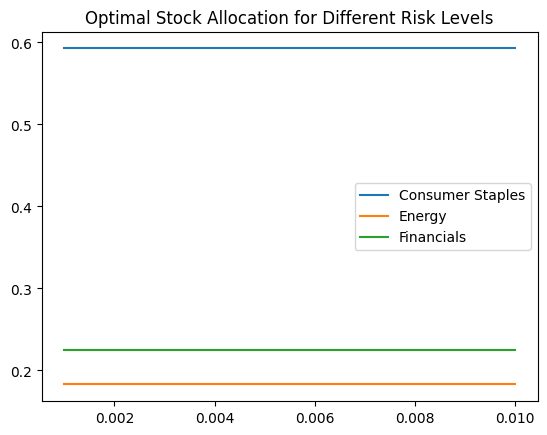

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')

# Check if the DataFrame is not empty before setting column names
if not param_analysis.empty:
    param_analysis.columns = ['Consumer Staples', 'Energy', 'Financials']
    param_analysis.plot()
    plt.title('Optimal Stock Allocation for Different Risk Levels')
    plt.show()
else:
    print("No feasible solutions found.")


In [ ]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[0.001, 0.001090909090909091, 0.0011818181818181819, 0.0012727272727272728, 0.0013636363636363637, 0.0014545454545454547, 0.0015454545454545456, 0.0016363636363636363, 0.0017272727272727275, 0.0018181818181818182, 0.0019090909090909093, 0.002, 0.002090909090909091, 0.002181818181818182, 0.0022727272727272726, 0.0023636363636363638, 0.002454545454545455, 0.0025454545454545456, 0.0026363636363636363, 0.0027272727272727275, 0.0028181818181818186, 0.0029090909090909093, 0.003, 0.003090909090909091, 0.003181818181818182, 0.003272727272727273, 0.003363636363636364, 0.003454545454545455, 0.0035454545454545456, 0.003636363636363637, 0.0037272727272727275, 0.0038181818181818187, 0.003909090909090909, 0.004, 0.004090909090909091, 0.004181818181818182, 0.0042727272727272735, 0.004363636363636364, 0.004454545454545455, 0.004545454545454545, 0.004636363636363636, 0.0047272727272727275, 0.004818181818181819, 0.00490909090909091, 0.005, 0.005090909090909091, 0.005181818181818182, 0.005272727272727273

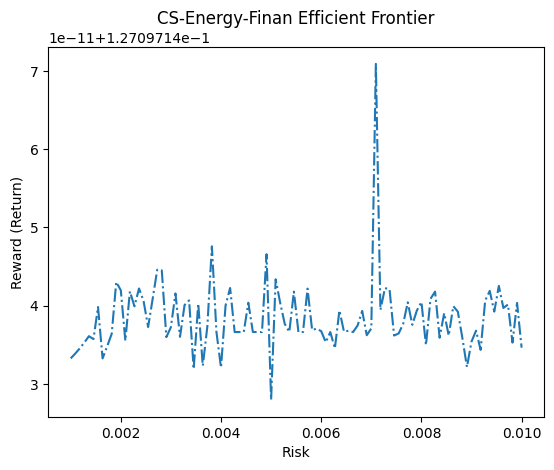

In [ ]:
# plot! pylab makes it easy
from pylab import *
plot(risk, reward, '-.')
title('CS-Energy-Finan Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()